# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 10

This is it, this is the last lab! / On est là, le dernièr lab!

https://en.wikipedia.org/wiki/All_Good_Things..._(Star_Trek:_The_Next_Generation)

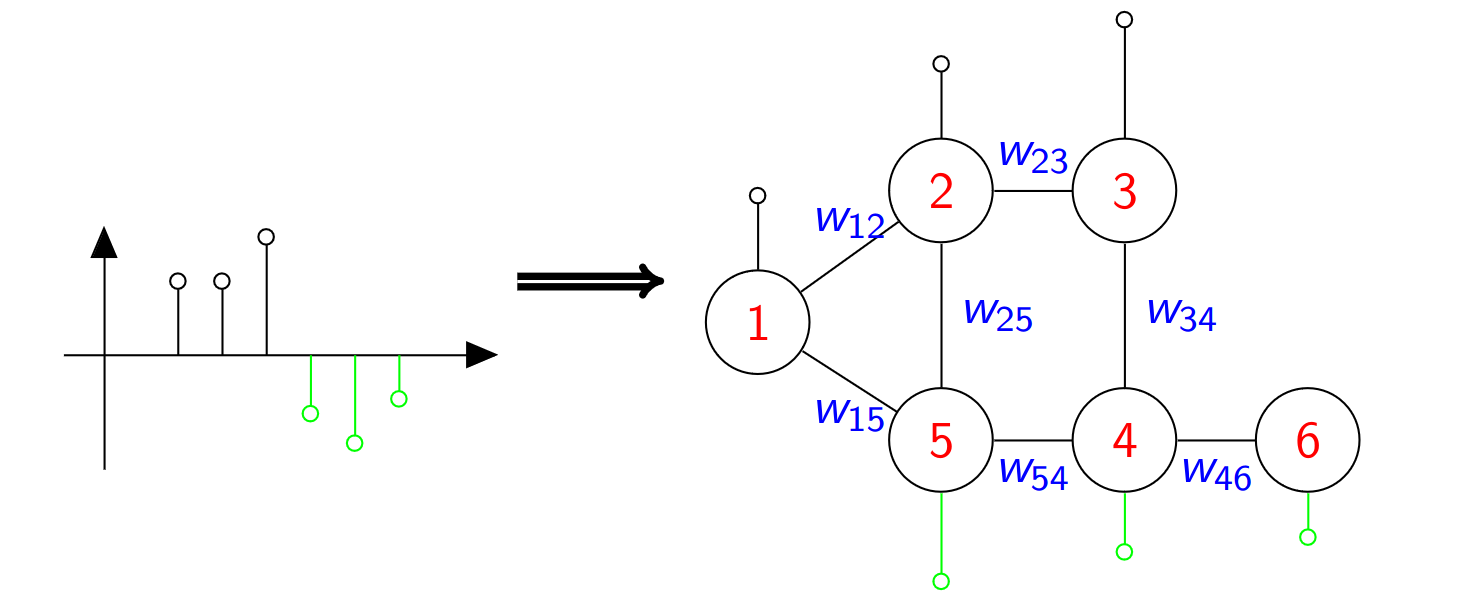


-----------------------

In this lab we will cover material from lecture 10. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 10' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 10. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 10' en teams. Je vous souhaite un beau laboratoire!



# Q1: Showing that Time Convolution is a Special Case of Graph Convolution

We will show that the graph convolution defined for a signal defined on an directed ring graph (slide 10) reduces to classical convolution operation.

The Graph Convolution on a Graph $G$ with a shift operator $S:=A $ is defined as the following:

$h * x = \sum_{k=0}^{K-1} h_k S^k x$.

The classical convolution is defined as:


$(h * x)_{k'} = \sum_{k=0}^{K-1}h_k x_{k'-k}$

For this question, we will use a graph with $N=10$ nodes, and a filter $h$ with 4 taps.

## Q1.a Define the Graph Shift Operator $S$ for a directed ring graph with 10 nodes. (10pt)

Set $S = A$. So you just need to define the adjacency matrix for a directed ring graph.

----------------------------

# Q1 : Montrer que la convolution temporelle est un cas particulier de convolution graphique

Nous montrerons que la convolution de graphe définie pour un signal défini sur un graphe en anneau directionnelle (diapositive 10) se réduit à une opération de convolution classique.

La convolution du graphe sur un graphe $G$ avec un opérateur de décalage $S:=A $ est définie comme suit :

$h * x = \sum_{k=0}^{K-1} h_k S^k x$.

La convolution classique est définie comme :


$(h * x)_{k'} = \sum_{k=0}^{K-1}h_k x_{k'-k}$

Pour cette question, nous utiliserons un graphe avec $N=10$ nœuds, et un filtre $h$ avec 4 taps.

## Q1.a Définissez l'opérateur de décalage de graphique $S$ pour un graphe en anneaux directionnelle avec 10 nœuds. (10pts)

Définissez $S = A$. Il vous suffit donc de définir la matrice de contiguïté pour un graphe en anneau orienté.

In [1]:
import numpy as np
N = 10

eye = np.eye(N)

S = np.roll(eye, -1, axis=1)


print(S)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


## Q2. Calculate the Graph Convolution (20pt)

The operation is as follows,

$h * x = \sum_{k=0}^{K-1} h_k S^k x$.

Use the signals $h$ and $x$ defined below, and use the Graph Shift operator $S$ that you have just defined.

--------------------------

## Q2. Calculer la convolution du graphique (20 pt)

Le fonctionnement est le suivant,

$h * x = \sum_{k=0}^{K-1} h_k S^k x$.

Utilisez les signaux $h$ et $x$ définis ci-dessous, et utilisez l'opérateur Graph Shift $S$ que vous venez de définir.


In [2]:
x = np.array([1, 2, 3, 4, 10, 9, 8, 7, 6, 5])

h = np.array([1, 1, 1, 1])/4


term1 = h[0]* x

onehop = S
term2 = h[1]* np.matmul(onehop, x)

twohop = np.matmul(S, S)
term3 = h[2]* np.matmul(twohop, x)

threehop = np.matmul(S, np.matmul(S, S))
term4 = h[3]* np.matmul(threehop, x)
print(onehop)
print(twohop)
print(threehop)

result = term1 + term2 + term3 + term4

print('Graph conv result = ', result)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Graph c

## Q1.c Calculate the regular circular convolution and confirm that you obtain the same result (15pt)

For calculating the regular circular convolution you can use `scipy.linalg.circulant`. Note that the end convolution result be of length 10. (Don't forget to pad!)

---------------------------------

## Q1.c Calculez la convolution circulaire régulière et confirmez que vous obtenez le même résultat (15pt)

Pour calculer la convolution circulaire régulière, vous pouvez utiliser `scipy.linalg.circulant`. Notez que le résultat final de la convolution est de longueur 10. (N'oubliez pas les paddings!)

In [4]:
from scipy.linalg import circulant

circmat = circulant(np.pad(h, (0, N-len(h)), 'constant'))
classical_circconv= np.matmul(circmat, x)

print(classical_circconv)

[4.75 3.5  2.75 2.5  4.75 6.5  7.75 8.5  7.5  6.5 ]


# Q2. Filtering using Graph Fourier Transform

In this question, we will compare classical filtering with Graph Filtering. Let's first get the signal.

-----------------------------

# Q2. Filtrage à l'aide de la transformée de Fourier graphique

Dans cette question, nous comparerons le filtrage classique avec le filtrage graphique. Commençons par recevoir le signal.

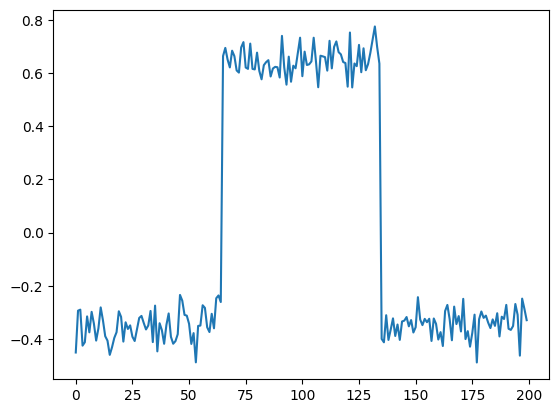

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
t = np.arange(N)

y = np.zeros((N,))
y[65:135] = 1
y = y + np.random.randn(N)*0.05

y = y - y.mean()

plt.plot(y)


## Q2.a Next, let's do standard Fourier filtering (15pt)

For this, calculate the Fourier transform of the input signal, take its absolute value, define a cutoff value, and set the frequency response of the signal to zero for values above this cutoff. Note that since DFT is a symmetric transform, you will need to have a mirror image structure in your filter.

Then once you are done with filtering, multiply the filtered spectrum with the the phase of the original signal, and then go back to the time domain. Plot the original and the filtered signal.  

-----------------------

## Q2.a Ensuite, faisons un filtrage de Fourier standard (15 pts)

Pour cela, calculez la transformée de Fourier du signal d'entrée, prenez sa valeur absolue, définissez une valeur de coupure et réglez la réponse en fréquence du signal à zéro pour les valeurs supérieures à cette coupure. Notez que puisque DFT est une transformation symétrique, vous devrez avoir une structure d'image miroir dans votre filtre.

Ensuite, une fois le filtrage terminé, multipliez le spectre filtré par la phase du signal d'origine, puis revenez au domaine temporel. Tracez l'original et le signal filtré.

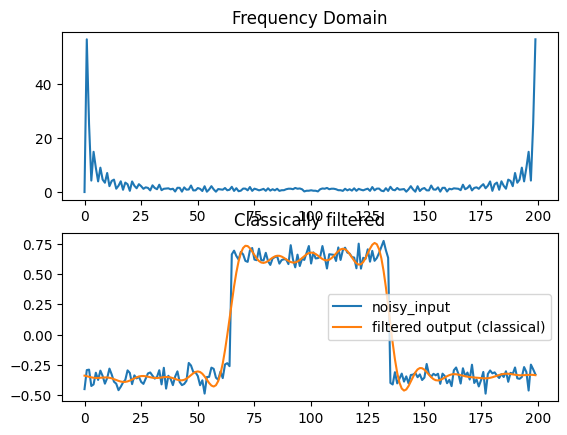

In [9]:

ccutoff = 15

y_freq = np.abs(np.fft.fft(y))

plt.subplot(211)
plt.plot(y_freq)
plt.title('Frequency Domain')

filtr = np.zeros(N)
filtr[:ccutoff] = 1
filtr[-ccutoff:] = 1
filtered = y_freq * filtr
filtered_time_classical = np.fft.ifft(filtered * np.exp(1j*np.angle(np.fft.fft(y))))

plt.subplot(212)
plt.plot(y, label='noisy_input')
plt.plot(filtered_time_classical, label='filtered output (classical)')
plt.title('Classically filtered')
plt.legend()





## Q2.b Next, let's do graph signal processing on a regular grid (20pt)

For this, we shall define an adjacency matrix using the time indices, such that, $A_{ij} = \exp( -\alpha \| t_i - t_j \|)$.

Then define the Laplacian such that $L = I - A$. Then follow the graph filtering steps we defined in the lecture. (Calculate the Eigenvalue decomposition of $L$, then project on the eigenvectors, filter, and then go back to the time domain)

-----------------------

## Q2.b Ensuite, effectuons le traitement du signal graphique sur une grille régulière (20 pt)

Pour cela, nous définirons une matrice d'adjacence utilisant les indices temporels, telle que $A_{ij} = \exp( -\alpha \| t_i - t_j \|)$.

Définissez ensuite le Laplacien tel que $L = I - A$. Suivez ensuite les étapes de filtrage graphique que nous avons définies dans la conférence. (Calculez la décomposition des valeurs propres de $L$, puis projetez sur les vecteurs propres, filtrez, puis revenez au domaine temporel)

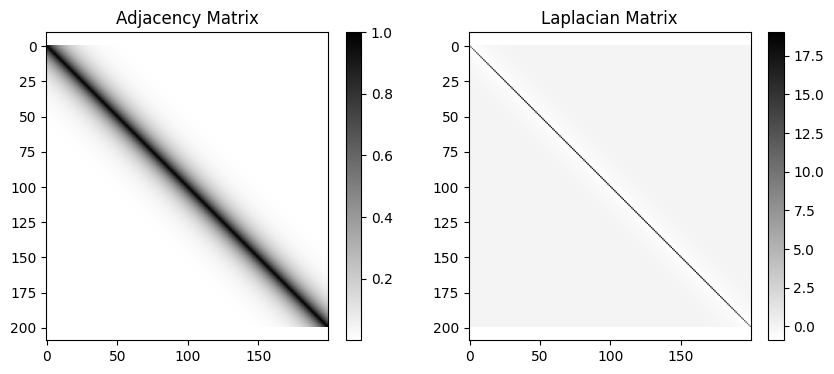

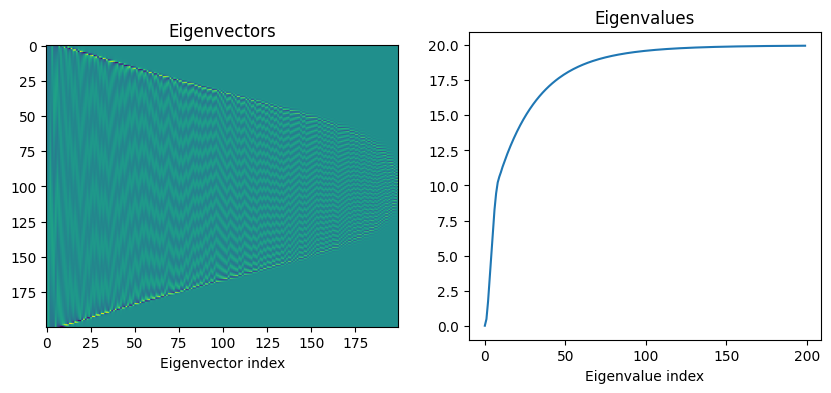

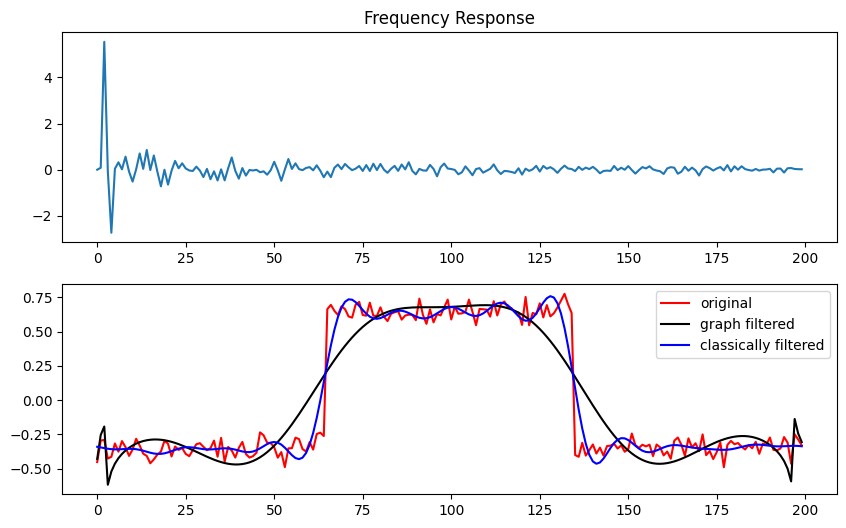

In [10]:
alpha = 0.1
gcutoff = 15
Amat = np.exp(-alpha*np.abs(np.subtract.outer(t, t)))

# get the Laplacian
Lmat =  np.diag(np.sum(Amat, axis=1)) - Amat

plt.figure(figsize=[10, 4], dpi=100)

plt.subplot(121)
plt.imshow(Amat, cmap='gray_r')
plt.colorbar()
plt.axis('equal')
plt.title('Adjacency Matrix')

plt.subplot(122)
plt.imshow(Lmat, cmap='gray_r')
plt.colorbar()
plt.axis('equal')
plt.title('Laplacian Matrix')

################

plt.figure(figsize=[10, 4], dpi=100)
plt.subplot(121)
U, V = np.linalg.eig(Lmat)

inds = np.argsort(U)
U = U[inds]
V = V[:, inds]

plt.imshow(V, aspect=0.8)
plt.xlabel('Eigenvector index')
plt.title('Eigenvectors')

plt.subplot(122)
plt.plot(U)
plt.xlabel('Eigenvalue index')
plt.title('Eigenvalues')

####################

plt.figure(figsize=[10, 6], dpi=100)
plt.subplot(211)
# get the frequency response
X = np.matmul(V.T, y)
fltr = np.zeros(200)
fltr[:gcutoff] = 1

plt.plot(X[:])
plt.title('Frequency Response')

plt.subplot(212)
X_filtred = X * fltr
# get the time domain signal
x_filtered = np.matmul(V, X_filtred)
plt.plot(t, y, '-r', label='original')
plt.plot(t, x_filtered, '-k', label='graph filtered')
plt.plot(t, filtered_time_classical, '-b', label='classically filtered')
plt.legend()


## Q2.c Imposing a more useful Graph structure (20pt)

Now, as we have seen in the lecture we'll try to do something a bit more interesting. Let's use an adjacency structure like the following in order to take advantage of the sample values.

$A_{ij} = \exp( -\alpha \| t_i - t_j \| - \beta \| x_i - x_j \| )$.

Then define the Laplacian such that $L = I - A$. Then follow the graph filtering steps as before. (Calculate the Eigenvalue decomposition of $L$, then project on the eigenvectors, filter, and then go back to the time domain)

Try to find a good tradeoff between $\alpha$ and $\beta$ such that we better preserve the jumps between 0 and 1, than the classical filtering, but still try to obtain some noise reduction (Something like what I had in the class). Basically we are trying to build a filter that preserves the edges by imposing a block-diagonal adjacency structure. Use same cutoff point you used for classical filtering here also so that the comparison is fair. (15 seems to be a good value)

-------------------------------------

## Q2.c Imposer une structure graphique plus utile (20pt)

Maintenant, comme nous l'avons vu dans le cours, nous allons essayer de faire quelque chose d'un peu plus intéressant. Utilisons une structure de contiguïté comme celle-ci afin de tirer parti des exemples de valeurs.

$A_{ij} = \exp( -\alpha \| t_i - t_j \| - \beta \| x_i - x_j \| )$.

Définissez ensuite le Laplacien tel que $L = I - A$. Suivez ensuite les étapes de filtrage graphique comme précédemment. (Calculez la décomposition des valeurs propres de $L$, puis projetez sur les vecteurs propres, filtrez, puis revenez au domaine temporel)

Essayez de trouver un bon compromis entre $\alpha$ et $\beta$ tel que l'on préserve mieux les sauts entre 0 et 1, que le filtrage classique, tout en essayant d'obtenir une certaine réduction du bruit (quelque chose comme ce que j'avais dans la classe ). Fondamentalement, nous essayons de construire un filtre qui préserve les bords en imposant une structure de contiguïté en blocs diagonales. Utilisez ici également le même point de coupure que vous avez utilisé pour le filtrage classique afin que la comparaison soit équitable. (15 semble être une bonne valeur)

c:\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


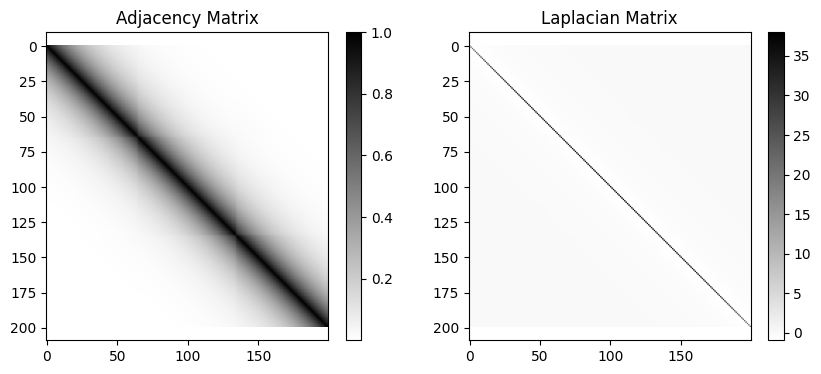

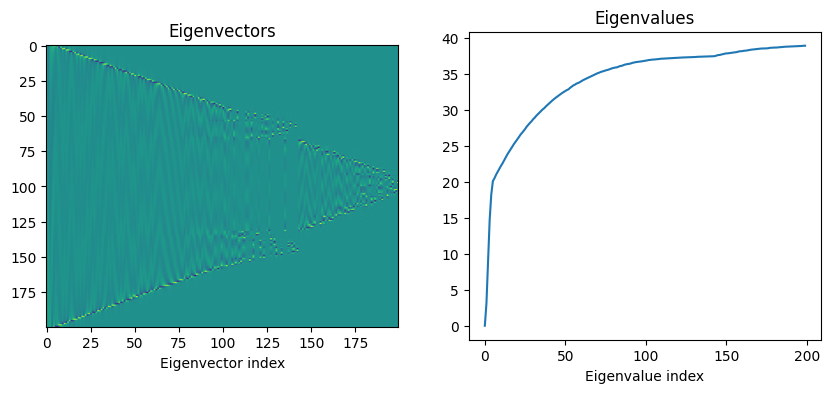

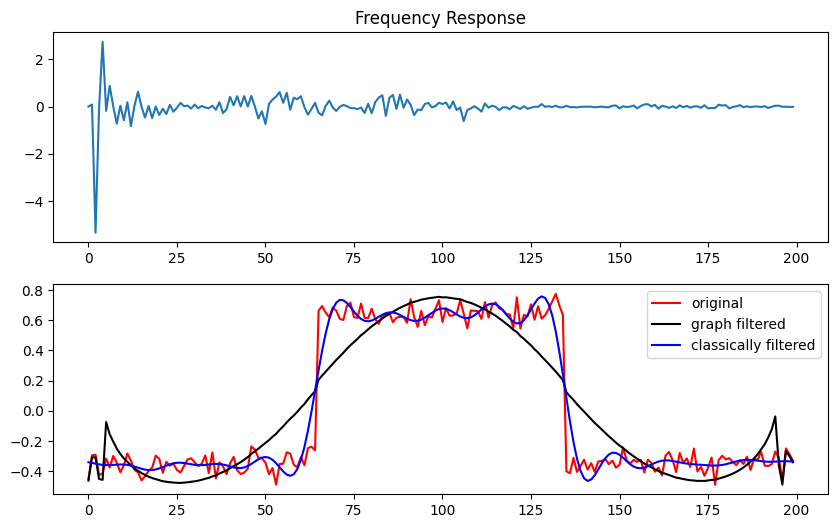

In [14]:
gcutoff = 15

alpha = 0.05
beta = 0.1

Amat = np.exp(-alpha * np.abs(np.subtract.outer(t, t)) - beta * np.abs(np.subtract.outer(y, y)))

Lmat =  np.diag(np.sum(Amat, axis=1)) - Amat

plt.figure(figsize=[10, 4], dpi=100)

plt.subplot(121)
plt.imshow(Amat, cmap='gray_r')
plt.colorbar()
plt.axis('equal')
plt.title('Adjacency Matrix')

plt.subplot(122)
plt.imshow(Lmat, cmap='gray_r')
plt.colorbar()
plt.axis('equal')
plt.title('Laplacian Matrix')

################

plt.figure(figsize=[10, 4], dpi=100)
plt.subplot(121)
U, V = np.linalg.eig(Lmat)

inds = np.argsort(U)
U = U[inds]
V = V[:, inds]

plt.imshow(V, aspect=0.8)
plt.xlabel('Eigenvector index')
plt.title('Eigenvectors')

plt.subplot(122)
plt.plot(U)
plt.xlabel('Eigenvalue index')
plt.title('Eigenvalues')

####################

plt.figure(figsize=[10, 6], dpi=100)
plt.subplot(211)
# get the frequency response
X = np.matmul(V.T, y)
fltr = np.zeros(200)
fltr[:gcutoff] = 1

plt.plot(X[:])
plt.title('Frequency Response')

plt.subplot(212)
X_filtred = X * fltr
# get the time domain signal
x_filtered = np.matmul(V, X_filtred)
plt.plot(t, y, '-r', label='original')
plt.plot(t, x_filtered, '-k', label='graph filtered')
plt.plot(t, filtered_time_classical, '-b', label='classically filtered')
plt.legend()
